<a href="https://colab.research.google.com/github/NsikakMenim/Data-Analysis-Portfolio/blob/main/bulldozer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Sales Price of Bulldozer Using Machine Laarning

In [ ]:
 import os
import zipfile
import pandas as pd

# Download the dataset
!wget https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip

# Unzip the file
local_zip = 'bluebook-for-bulldozers.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('.')  # Extract all data into the current directory

# Load CSV into DataFrame
file_path = os.path.join(os.getcwd(), '/content/bluebook-for-bulldozers/TrainAndValid.csv')  # Ensure correct file path
df = pd.read_csv(file_path, low_memory=False, parse_dates=["saledate"])




--2025-03-04 11:37:03--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip [following]
--2025-03-04 11:37:04--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72042477 (69M) [application/zip]
Saving to: ‘bluebook-for-bulldozers.zip.1’

bluebook-for-bulldo 100%[===================>]  68.70M   274MB/s    in 0.3s    

2025-03-04 11:37:04 (2

In [ ]:
# Display first few rows
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

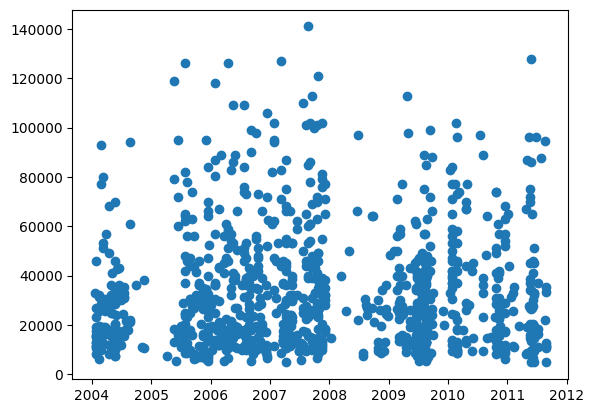

In [ ]:
fig, ax= plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

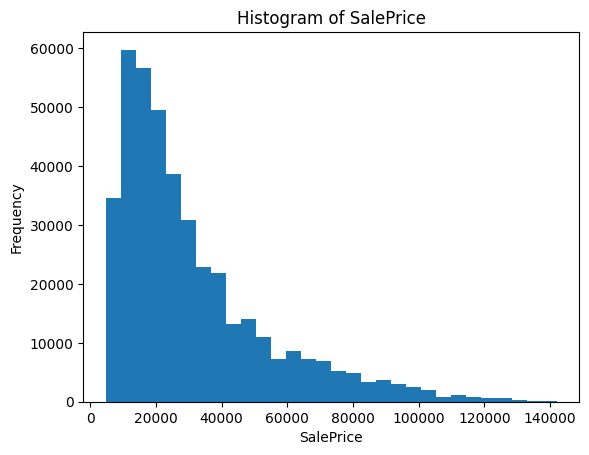

In [ ]:
# prompt: use histogram to plot it

import matplotlib.pyplot as plt

# Assuming 'df' and 'SalePrice' column exist from previous code
plt.hist(df['SalePrice'], bins=30)  # Adjust 'bins' as needed
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice')
plt.show()


In [ ]:
df.isnull().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
saledate,0


In [ ]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
df.sort_values(by='saledate', inplace=True, ascending=False)
df.saledate.head()

,saledate
411423,2012-04-28
409783,2012-04-28
409202,2012-04-28
411522,2012-04-28
409203,2012-04-28


In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
411423,6309986,16000.0,1899882,9508,149,99.0,2005,NaN,NaN,2012-04-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
409783,6286233,24000.0,1932403,4605,149,99.0,2005,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409202,6283634,35000.0,1930870,4701,149,99.0,1998,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
411522,6310488,7000.0,1911585,9550,149,99.0,1000,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409203,6283635,34000.0,1869284,4701,149,99.0,1000,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [ ]:
df_tmp = df.copy()
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
411423,6309986,16000.0,1899882,9508,149,99.0,2005,NaN,NaN,2012-04-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
409783,6286233,24000.0,1932403,4605,149,99.0,2005,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409202,6283634,35000.0,1930870,4701,149,99.0,1998,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
411522,6310488,7000.0,1911585,9550,149,99.0,1000,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409203,6283635,34000.0,1869284,4701,149,99.0,1000,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


### Add datetime parameters

In [ ]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear


In [ ]:
# drop saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [ ]:
#Check values of different columns
df_tmp.state.value_counts()

,count
state,
Florida,67320
Texas,53110
California,29761
Washington,16222
Georgia,14633
Maryland,13322
Mississippi,13240
Ohio,12369
Illinois,11540


## Modelling

In [ ]:
df.isnull().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
saledate,0


In [ ]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 411423 to 205615
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [ ]:
# Find the columns which contain strings
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [ ]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 411423 to 205615
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [ ]:
df_tmp.isnull().sum()/len(df_tmp)

,0
SalesID,0.000000
SalePrice,0.000000
MachineID,0.000000
ModelID,0.000000
datasource,0.000000
auctioneerID,0.048791
YearMade,0.000000
MachineHoursCurrentMeter,0.642586
UsageBand,0.821492
fiModelDesc,0.000000


#### Save Preprocessed Data

In [ ]:
# Export current tmp dataframe
df_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv", index=False)

In [ ]:
# Import preprocessed data
df_tmp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv",
                     low_memory=False)

In [ ]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,6309986,16000.0,1899882,9508,149,99.0,2005,NaN,NaN,331,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
1,6286233,24000.0,1932403,4605,149,99.0,2005,NaN,NaN,310G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
2,6283634,35000.0,1930870,4701,149,99.0,1998,NaN,NaN,544H,...,NaN,NaN,NaN,Standard,Conventional,2012,4,28,5,119
3,6310488,7000.0,1911585,9550,149,99.0,1000,NaN,NaN,753,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
4,6283635,34000.0,1869284,4701,149,99.0,1000,NaN,NaN,544H,...,NaN,NaN,NaN,Standard,Conventional,2012,4,28,5,119


## Fill Missing Values
### Fill numerical missing values first

In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [ ]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tells us if the data was missing or not
      df_tmp[label+"_is_missing"] = pd.isnull(content)
      # Fill missing numeric values with median
      df_tmp[label] = content.fillna(content.median())

In [ ]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [ ]:
# check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

,count
auctioneerID_is_missing,
False,392562
True,20136


### Filling and turning categorical variables into numbers

In [ ]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# Turn categorical columns into numbers and fill missing
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add binary column to indicate whether sample had missing value
    df_tmp[label+"_is_missing"] = pd.isnull(content)
    # Turn categories into numbers and add+1
    df_tmp[label] = pd.Categorical(content).codes+1

In [ ]:
pd.Categorical(df_tmp["state"]).codes + 1

array([ 5,  5,  5, ...,  9,  9, 44], dtype=int8)

In [ ]:
df_tmp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
...,...
Backhoe_Mounting_is_missing,0
Blade_Type_is_missing,0
Travel_Controls_is_missing,0
Differential_Type_is_missing,0


In [ ]:
len(df_tmp)

412698

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

def build_model(df_tmp):
    # Split the data into training and validation sets
    df_train = df_tmp[df_tmp.saleYear != 2012]
    df_val = df_tmp[df_tmp.saleYear == 2012]

    X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
    X_val, y_val = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

    # Define the parameter grid for Random Forest
    rf_param_grid = {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_samples": [10000],
        "max_features": ["sqrt", "log2"]
    }

    # Initialize Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)

    # Perform RandomizedSearchCV
    rf_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=rf_param_grid,
        n_iter=10,   # Number of random combinations to try
        cv=3,        # 3-fold cross-validation
        verbose=1,
        random_state=42,
        n_jobs=-1    # Use all available CPU cores
    )

    # Fit the model using RandomizedSearchCV
    rf_search.fit(X_train, y_train)

    # Get the best parameters
    best_rf_params = rf_search.best_params_
    print(f"Best Random Forest Parameters: {best_rf_params}")

    # Train Random Forest with the best parameters
    best_rf = RandomForestRegressor(**best_rf_params, random_state=42)
    best_rf.fit(X_train, y_train)

    # Make predictions on both training and validation sets
    train_pred = best_rf.predict(X_train)
    val_pred = best_rf.predict(X_val)

    # Evaluate on the training set
    train_mse = mean_squared_error(y_train, train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)

    # Handle MSLE computation for training data
    if (y_train < 0).any() or (train_pred < 0).any():
        train_msle = "Cannot compute MSLE (negative values found)"
    else:
        train_msle = mean_squared_log_error(y_train, train_pred)

    # Evaluate on the validation set
    val_mse = mean_squared_error(y_val, val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, val_pred)
    val_mae = mean_absolute_error(y_val, val_pred)

    # Handle MSLE computation for validation data
    if (y_val < 0).any() or (val_pred < 0).any():
        val_msle = "Cannot compute MSLE (negative values found)"
    else:
        val_msle = mean_squared_log_error(y_val, val_pred)

    # Store results
    results = {
        "Train": {"MSE": train_mse, "RMSE": train_rmse, "R^2": train_r2, "MAE": train_mae, "MSLE": train_msle},
        "Test": {"MSE": val_mse, "RMSE": val_rmse, "R^2": val_r2, "MAE": val_mae, "MSLE": val_msle}
    }

    # Print results
    print(f"Random Forest (Optimized) - Training Results:")
    print(f"  MSE: {train_mse}")
    print(f"  RMSE: {train_rmse}")
    print(f"  R^2: {train_r2}")
    print(f"  MAE: {train_mae}")
    print(f"  MSLE: {train_msle}")
    print("-" * 20)

    print(f"Random Forest (Optimized) - Validation (Test) Results:")
    print(f"  MSE: {val_mse}")
    print(f"  RMSE: {val_rmse}")
    print(f"  R^2: {val_r2}")
    print(f"  MAE: {val_mae}")
    print(f"  MSLE: {val_msle}")
    print("=" * 40)

    return results


In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

# def build_models(df_tmp):
#     # Split the data into training and validation sets
#     df_train = df_tmp[df_tmp.saleYear != 2012]
#     df_val = df_tmp[df_tmp.saleYear == 2012]

#     X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
#     X_val, y_val = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

#     models = {
#         "Linear Regression": LinearRegression(),
#         "Random Forest": RandomForestRegressor(random_state=42, max_samples=min(10000, len(X_train))),
#         "Gradient Boosting": GradientBoostingRegressor(random_state=42)
#     }

#     results = {}
#     for name, model in models.items():
#         # Fit the model to the training data
#         model.fit(X_train, y_train)

#         # Make predictions on both training and validation sets
#         train_pred = model.predict(X_train)
#         val_pred = model.predict(X_val)

#         # Evaluate on the training set
#         train_mse = mean_squared_error(y_train, train_pred)
#         train_rmse = np.sqrt(train_mse)
#         train_r2 = r2_score(y_train, train_pred)
#         train_mae = mean_absolute_error(y_train, train_pred)

#         # Handle MSLE computation for training data
#         if (y_train < 0).any() or (train_pred < 0).any():
#             train_msle = "Cannot compute MSLE (negative values found)"
#         else:
#             train_msle = mean_squared_log_error(y_train, train_pred)

#         # Evaluate on the validation set
#         val_mse = mean_squared_error(y_val, val_pred)
#         val_rmse = np.sqrt(val_mse)
#         val_r2 = r2_score(y_val, val_pred)
#         val_mae = mean_absolute_error(y_val, val_pred)

#         # Handle MSLE computation for validation data
#         if (y_val < 0).any() or (val_pred < 0).any():
#             val_msle = "Cannot compute MSLE (negative values found)"
#         else:
#             val_msle = mean_squared_log_error(y_val, val_pred)

#         # Store results
#         results[name] = {
#             "Train": {"MSE": train_mse, "RMSE": train_rmse, "R^2": train_r2, "MAE": train_mae, "MSLE": train_msle},
#             "Test": {"MSE": val_mse, "RMSE": val_rmse, "R^2": val_r2, "MAE": val_mae, "MSLE": val_msle}
#         }

#         # Print results
#         print(f"{name} - Training Results:")
#         print(f"  MSE: {train_mse}")
#         print(f"  RMSE: {train_rmse}")
#         print(f"  R^2: {train_r2}")
#         print(f"  MAE: {train_mae}")
#         print(f"  MSLE: {train_msle}")
#         print("-" * 20)

#         print(f"{name} - Validation (Test) Results:")
#         print(f"  MSE: {val_mse}")
#         print(f"  RMSE: {val_rmse}")
#         print(f"  R^2: {val_r2}")
#         print(f"  MAE: {val_mae}")
#         print(f"  MSLE: {val_msle}")
#         print("=" * 40)

#     return results


In [ ]:
# prompt: run in
build_models(df_tmp)


Tuning Random Forest...
Best RF Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': 10000, 'max_features': 'sqrt', 'max_depth': 20}
Tuning Gradient Boosting...


In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

# def build_models(df_tmp):
#     # Split the data into training and validation sets
#     df_train = df_tmp[df_tmp.saleYear != 2012]
#     df_val = df_tmp[df_tmp.saleYear == 2012]

#     X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
#     X_val, y_val = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

#     # Define parameter grids for hyperparameter tuning
#     rf_params = {
#         "max_samples": [10000],
#         "n_estimators": [100, 200, 300],
#         "max_depth": [None, 10, 20, 30],
#         "min_samples_split": [2, 5, 10],
#         "min_samples_leaf": [1, 2, 4],
#         "max_features": ["sqrt", "log2"]
#     }

#     gb_params = {
#         "n_estimators": [100, 200, 300],
#         "learning_rate": [0.01, 0.1, 0.2],
#         "max_depth": [3, 5, 10],
#         "subsample": [0.8, 1.0]
#     }

#     # Hyperparameter tuning with RandomizedSearchCV
#     rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
#                                    param_distributions=rf_params,
#                                    n_iter=10,
#                                    cv=3,
#                                    scoring="neg_mean_squared_error",
#                                    random_state=42,
#                                    n_jobs=-1)

#     gb_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),
#                                    param_distributions=gb_params,
#                                    n_iter=10,
#                                    cv=3,
#                                    scoring="neg_mean_squared_error",
#                                    random_state=42,
#                                    n_jobs=-1)

#     print("Tuning Random Forest...")
#     rf_search.fit(X_train, y_train)
#     print(f"Best RF Params: {rf_search.best_params_}")

#     print("Tuning Gradient Boosting...")
#     gb_search.fit(X_train, y_train)
#     print(f"Best GB Params: {gb_search.best_params_}")

#     # Optimized models
#     models = {
#         "Linear Regression": LinearRegression(),
#         "Random Forest": rf_search.best_estimator_,
#         "Gradient Boosting": gb_search.best_estimator_
#     }

#     results = {}
#     for name, model in models.items():
#         # Fit the model to the training data
#         model.fit(X_train, y_train)

#         # Make predictions on both training and validation sets
#         train_pred = model.predict(X_train)
#         val_pred = model.predict(X_val)

#         # Evaluate on the training set
#         train_mse = mean_squared_error(y_train, train_pred)
#         train_rmse = np.sqrt(train_mse)
#         train_r2 = r2_score(y_train, train_pred)
#         train_mae = mean_absolute_error(y_train, train_pred)

#         # Handle MSLE computation for training data
#         if (y_train < 0).any() or (train_pred < 0).any():
#             train_msle = "Cannot compute MSLE (negative values found)"
#         else:
#             train_msle = mean_squared_log_error(y_train, train_pred)

#         # Evaluate on the validation set
#         val_mse = mean_squared_error(y_val, val_pred)
#         val_rmse = np.sqrt(val_mse)
#         val_r2 = r2_score(y_val, val_pred)
#         val_mae = mean_absolute_error(y_val, val_pred)

#         # Handle MSLE computation for validation data
#         if (y_val < 0).any() or (val_pred < 0).any():
#             val_msle = "Cannot compute MSLE (negative values found)"
#         else:
#             val_msle = mean_squared_log_error(y_val, val_pred)

#         # Store results
#         results[name] = {
#             "Train": {"MSE": train_mse, "RMSE": train_rmse, "R^2": train_r2, "MAE": train_mae, "MSLE": train_msle},
#             "Test": {"MSE": val_mse, "RMSE": val_rmse, "R^2": val_r2, "MAE": val_mae, "MSLE": val_msle}
#         }

#         # Print results
#         print(f"{name} - Training Results:")
#         print(f"  MSE: {train_mse}")
#         print(f"  RMSE: {train_rmse}")
#         print(f"  R^2: {train_r2}")
#         print(f"  MAE: {train_mae}")
#         print(f"  MSLE: {train_msle}")
#         print("-" * 20)

#         print(f"{name} - Validation (Test) Results:")
#         print(f"  MSE: {val_mse}")
#         print(f"  RMSE: {val_rmse}")
#         print(f"  R^2: {val_r2}")
#         print(f"  MAE: {val_mae}")
#         print(f"  MSLE: {val_msle}")
#         print("=" * 40)

#     return results


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

# # Define the model with the best parameters
# rf_model = RandomForestRegressor(
#     n_estimators=100,          # Number of trees
#     min_samples_split=5,       # Minimum samples required to split a node
#     min_samples_leaf=1,        # Minimum samples required at a leaf node
#     max_samples=10000,         # Limit training samples to 10,000
#     max_features='sqrt',       # Number of features considered at each split
#     max_depth=20,              # Maximum depth of each tree
#     random_state=42,           # Ensures reproducibility
#     n_jobs=-1                  # Use all CPU cores for parallel processing
# )

# # Fit the model (Assuming X_train and y_train are already defined)
# rf_model.fit(X_train, y_train)

# # Predict on validation set
# y_pred = rf_model.predict(X_val)

# # Compute evaluation metrics
# mse = mean_squared_error(y_val, y_pred)
# rmse = mse ** 0.5
# r2 = r2_score(y_val, y_pred)
# mae = mean_absolute_error(y_val, y_pred)

# # Compute RMSLE only if there are no negative values (log errors require positive values)
# if (y_val < 0).any() or (y_pred < 0).any():
#     rmsle = "Cannot compute RMSLE (negative values found)"
# else:
#     rmsle = mean_squared_log_error(y_val, y_pred) ** 0.5

# # Print metrics
# print(f"Validation MSE: {mse}")
# print(f"Validation RMSE: {rmse}")
# print(f"Validation R²: {r2}")
# print(f"Validation MAE: {mae}")
# print(f"Validation RMSLE: {rmsle}")


In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

# def build_models(df_tmp):
#     # Split the data into training and validation sets
#     df_train = df_tmp[df_tmp.saleYear != 2012]
#     df_val = df_tmp[df_tmp.saleYear == 2012]

#     X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
#     X_val, y_val = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

#     models = [
#         {
#             "name": "Linear Regression",
#             "model": LinearRegression(),
#             "params": None  # No hyperparameters to tune
#         },
#         {
#             "name": "Random Forest",
#             "model": RandomForestRegressor(random_state=42),
#             "params": {
#                 "max_samples": [10000],
#                 'n_estimators': [100, 200, 300, 400],
#                 'max_depth': [None, 10, 20, 30],
#                 'min_samples_split': [2, 5, 10],
#                 'min_samples_leaf': [1, 2, 4],
#                 'max_features': ['sqrt', 'log2']
#             }
#         },
#         {
#             "name": "Gradient Boosting",
#             "model": GradientBoostingRegressor(random_state=42),
#             "params": {
#                 'n_estimators': [100, 200, 300],
#                 'learning_rate': [0.01, 0.05, 0.1],
#                 'max_depth': [3, 4, 5],
#                 'min_samples_split': [2, 5, 10],
#                 'subsample': [0.8, 0.9, 1.0],
#                 'max_features': ['sqrt', 'log2', None]
#             }
#         }
#     ]

#     results = {}
#     for model_info in models:
#         name = model_info["name"]
#         model = model_info["model"]
#         params = model_info["params"]

#         print(f"\nProcessing {name}...")

#         if params is not None:
#             # Perform RandomizedSearchCV
#             print(f"Hyperparameter tuning for {name}...")
#             search = RandomizedSearchCV(
#                 estimator=model,
#                 param_distributions=params,
#                 n_iter=20,  # Adjust based on computational resources
#                 cv=3,
#                 scoring='neg_mean_squared_error',
#                 verbose=1,
#                 random_state=42,
#                 n_jobs=-1
#             )
#             search.fit(X_train, y_train)
#             best_model = search.best_estimator_
#             print(f"Best parameters: {search.best_params_}")
#         else:
#             # No hyperparameter tuning needed
#             best_model = model
#             best_model.fit(X_train, y_train)

#         # Generate predictions
#         train_pred = best_model.predict(X_train)
#         val_pred = best_model.predict(X_val)

#         # Evaluation metrics
#         def calculate_metrics(y_true, pred):
#             metrics = {
#                 "MSE": mean_squared_error(y_true, pred),
#                 "RMSE": np.sqrt(mean_squared_error(y_true, pred)),
#                 "R^2": r2_score(y_true, pred),
#                 "MAE": mean_absolute_error(y_true, pred)
#             }
#             try:
#                 metrics["MSLE"] = mean_squared_log_error(y_true, pred)
#             except ValueError:
#                 metrics["MSLE"] = "Cannot compute (negative values)"
#             return metrics

#         results[name] = {
#             "Train": calculate_metrics(y_train, train_pred),
#             "Validation": calculate_metrics(y_val, val_pred)
#         }

#         # Print results
#         print(f"\n{name} Training Metrics:")
#         for metric, value in results[name]["Train"].items():
#             print(f"{metric}: {value}")

#         print(f"\n{name} Validation Metrics:")
#         for metric, value in results[name]["Validation"].items():
#             print(f"{metric}: {value}")
#         print("=" * 60)

#     return results

In [ ]:
build_models(df_tmp)